### Get all time related vectors from BehaviorSync and create some basic comparisons

In [1]:
import pathlib
from datetime import datetime
current_working_directory = pathlib.Path.cwd()
sync_results_folder = pathlib.Path(current_working_directory, 'sync_results')

sync_results_filename_base = 'time_comparison_stats_behaviorsync_'

sync_results_file = pathlib.Path(sync_results_folder, sync_results_filename_base+datetime.now().strftime('%Y%m%d')+'.pkl')
sync_results_file



PosixPath('/mnt/cup/braininit/Shared/repos/TestU19PipelinePython/U19-pipeline-python/notebooks/ephys_element/ephys_sync_notebooks/sync_results/time_comparison_stats_behaviorsync_20260219.pkl')

In [ ]:


from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

In [2]:
import u19_pipeline.ephys_pipeline as ep
import u19_pipeline.recording as recording
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import numpy as np


[2026-02-18 17:42:10,442][INFO]: DataJoint 0.14.4 connected to alvaros@datajoint00.pni.princeton.edu:3306


#### Select recording_ids to fetch from

In [3]:
recording_query = "recording_id > 350 and recording_id < 1000"
recording = dj.create_virtual_module('recording', 'u19_recording')

sync_records = pd.DataFrame((ep.BehaviorSync & recording_query).fetch('recording_id', 'sync_data', 'block_sync', as_dict=True))

session_fields = ['subject_fullname', 'session_date', 'session_number']
session_keys = (recording.Recording.BehaviorSession & recording_query).fetch(*session_fields, as_dict=True, order_by='recording_id')

session_plus_recording_keys = pd.DataFrame((recording.Recording.BehaviorSession & recording_query).fetch(as_dict=True, order_by='recording_id'))
behavior = dj.create_virtual_module('behavior','u19_behavior')
behavior_time_records = pd.DataFrame((behavior.SpatialTimeBlobs & session_keys).fetch(*session_fields, 'trial_time', 'cumulative_session_time', 'iteration_matrix',as_dict=True))



In [4]:
all_data = pd.merge(session_plus_recording_keys, sync_records)
all_data = pd.merge(all_data, behavior_time_records)
all_data

,recording_id,subject_fullname,session_date,session_number,sync_data,block_sync,iteration_matrix,trial_time,cumulative_session_time
0,351,jyanar_ya014,2024-07-25,0,"{'trial_idx_vector': [90594, 191136, 241664, 2...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0220034], [0.0305284], [0.0419621],...","[[0.8327963], [0.8547997], [0.8633247], [0.874..."
1,352,jyanar_ya014,2024-07-26,0,"{'trial_idx_vector': [96301, 175907, 219992, 2...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0488243], [0.0596835], [0.0758483],...","[[1.0398619], [1.0886862], [1.0995455], [1.115..."
2,353,jyanar_ya014,2024-07-27,0,"{'trial_idx_vector': [146686, 245890, 288507, ...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0246257], [0.0349771], [0.0494041],...","[[0.982837], [1.0074627], [1.0178142], [1.0322..."
3,354,jyanar_ya013,2024-07-06,0,"{'trial_idx_vector': [101243, 1110280, 1516109...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0220563], [0.0300902], [0.0400381],...","[[0.7023001], [0.72435635], [0.7323903], [0.74..."
4,355,jk8386_jk44,2024-08-07,2,"{'trial_idx_vector': [386104, 435365, 510851, ...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0380206], [0.0524379], [0.0652661],...","[[0.2457786], [0.2837992], [0.29821652], [0.31..."
...,...,...,...,...,...,...,...,...,...
257,612,jyanar_ya062,2026-02-03,0,"{'trial_idx_vector': [1304663, 1627821, 190837...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0988649], [0.1701385], [0.2086989],...","[[3.1474848], [3.2463496], [3.3176234], [3.356..."
258,613,jyanar_ya062,2026-02-04,0,"{'trial_idx_vector': [1313701, 1653176, 196350...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.1061458], [0.1746648], [0.2216633],...","[[3.1713588], [3.2775047], [3.3460236], [3.393..."
259,614,jk8386_jknpx6,2026-02-03,0,"{'trial_idx_vector': [79512, 134470, 210992, 2...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0464804], [0.0523152], [0.0620358],...","[[0.5193606], [0.565841], [0.5716758], [0.5813..."
260,615,jk8386_jknpx7,2026-02-03,0,"{'trial_idx_vector': [54088, 1051721, 1169643,...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.0], [0.0112872], [0.0167028], [0.0247912],...","[[0.328177], [0.33946422], [0.3448798], [0.352..."


In [ ]:

stats_list = []
for i in range(all_data.shape[0]):

    stats_dict = all_data.loc[i,['recording_id', 'subject_fullname', 'session_date', 'session_number']].to_dict().copy()

    all_vectors = ep.get_full_vectors_from_key({'recording_id': all_data.loc[i,'recording_id']})

    time_as_behavior_fullsession = np.concatenate(([x for x in all_vectors['time_as_behavior_fullsession']]), axis=0) 
    time_as_behavior_trial_ind = np.concatenate(([x for x in all_vectors['time_as_behavior_trial_ind']]), axis=0) 

    time_as_behavior_fullsession_v = np.concatenate(([x for x in all_vectors['time_as_behavior_fullsession_virmen']]), axis=0) 
    time_as_behavior_trial_ind_v = np.concatenate(([x for x in all_vectors['time_as_behavior_trial_ind_virmen']]), axis=0) 

    behavior_time_trial_time = all_data.loc[i, 'trial_time']
    behavior_cumulative_session_time = all_data.loc[i, 'cumulative_session_time']

    if not np.isnan(all_data.loc[i, 'block_sync']):
        idx_behavior_time = all_data.loc[i, 'iteration_matrix'][:,0] == all_data.loc[i, 'block_sync']

        behavior_time_trial_time = behavior_time_trial_time.squeeze()
        behavior_time_trial_time = behavior_time_trial_time[idx_behavior_time]

        behavior_cumulative_session_time = behavior_cumulative_session_time.squeeze()
        behavior_cumulative_session_time = behavior_cumulative_session_time[idx_behavior_time]

    diff_shape_vectors = behavior_time_trial_time.squeeze().shape[0] - time_as_behavior_trial_ind.shape[0]

    if diff_shape_vectors != 0 and diff_shape_vectors < 2000:
        print('too few iteration diff, probably last trial incomplete')

        behavior_time_trial_time = behavior_time_trial_time.squeeze()
        print(behavior_time_trial_time.shape[0])
        behavior_time_trial_time = behavior_time_trial_time[:time_as_behavior_trial_ind.shape[0]]
        time_as_behavior_trial_ind_v = time_as_behavior_trial_ind_v[:time_as_behavior_trial_ind.shape[0]]
        time_as_behavior_fullsession_v = time_as_behavior_fullsession_v[:time_as_behavior_trial_ind.shape[0]]

        print(behavior_time_trial_time.shape[0])

        behavior_cumulative_session_time = behavior_cumulative_session_time.squeeze()
        behavior_cumulative_session_time = behavior_cumulative_session_time[:time_as_behavior_trial_ind.shape[0]]

        diff_shape_vectors = 0
        

    if diff_shape_vectors == 0:

        diff_time_trial_ind = time_as_behavior_trial_ind - behavior_time_trial_time.squeeze()
        diff_time_trial_ind_v = time_as_behavior_trial_ind_v - behavior_time_trial_time.squeeze() 

        
        diff_time_trial_full_session = time_as_behavior_fullsession - (behavior_cumulative_session_time.squeeze() - behavior_cumulative_session_time[0])
        diff_time_trial_full_session_v = time_as_behavior_fullsession_v - (behavior_cumulative_session_time.squeeze() - behavior_cumulative_session_time[0])

        diff_times_trial_inds = time_as_behavior_trial_ind_v - time_as_behavior_trial_ind

        stats_dict['last_diff_trial_ind'] = diff_time_trial_ind[-1].copy()
        stats_dict['last_diff_trial_ind_v'] = diff_time_trial_ind_v[-1].copy()
        stats_dict['last_diff_trial_inds'] = diff_times_trial_inds[-1].copy()

        stats_dict['last_diff_time_trial_full_session'] = diff_time_trial_full_session[-1].copy()
        stats_dict['last_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v[-1].copy()

        diff_time_trial_ind = diff_time_trial_ind[:-1]
        diff_time_trial_ind_v = diff_time_trial_ind_v[:-1]
        diff_times_trial_inds = diff_times_trial_inds[:-1]
        diff_time_trial_full_session = diff_time_trial_full_session[:-1]
        diff_time_trial_full_session_v = diff_time_trial_full_session_v[:-1]

        stats_dict['max_diff_time_trial_ind'] = diff_time_trial_ind.max()
        stats_dict['max_diff_time_trial_ind_v'] = diff_time_trial_ind_v.max()
        stats_dict['max_diff_time_trial_inds'] = diff_times_trial_inds.max()
        stats_dict['max_diff_time_trial_full_session'] = diff_time_trial_full_session.max()
        stats_dict['max_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.max()

        stats_dict['min_diff_time_trial_ind'] = diff_time_trial_ind.min()
        stats_dict['min_diff_time_trial_ind_v'] = diff_time_trial_ind_v.min()
        stats_dict['min_diff_time_trial_inds'] = diff_times_trial_inds.min()
        stats_dict['min_diff_time_trial_full_session'] = diff_time_trial_full_session.min()
        stats_dict['min_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.min()

        stats_dict['mean_diff_time_trial_ind'] = diff_time_trial_ind.mean()
        stats_dict['mean_diff_time_trial_ind_v'] = diff_time_trial_ind_v.mean()
        stats_dict['mean_diff_time_trial_inds'] = diff_times_trial_inds.mean()
        stats_dict['mean_diff_time_trial_full_session'] = diff_time_trial_full_session.mean()
        stats_dict['mean_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.mean()

        stats_dict['std_diff_time_trial_ind'] = diff_time_trial_ind.std()
        stats_dict['std_diff_time_trial_ind_v'] = diff_time_trial_ind_v.std()
        stats_dict['std_diff_time_trial_inds'] = diff_times_trial_inds.std()
        stats_dict['std_diff_time_trial_full_session'] = diff_time_trial_full_session.std()
        stats_dict['std_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.std()

        stats_dict['percent_little_diff_time_trial_ind'] = (np.sum(np.abs(diff_time_trial_ind) < 0.1)*100) / diff_time_trial_ind.shape[0]
        stats_dict['percent_little_diff_time_trial_ind_v'] = (np.sum(np.abs(diff_time_trial_ind_v) < 0.1)*100) / diff_time_trial_ind_v.shape[0]
        stats_dict['percent_little_diff_time_trial_inds'] = (np.sum(np.abs(diff_times_trial_inds) < 0.1)*100) / diff_times_trial_inds.shape[0]
        stats_dict['percent_little_diff_time_trial_full_session'] = (np.sum(np.abs(diff_time_trial_full_session) < 0.1)*100) / diff_time_trial_full_session.shape[0]
        stats_dict['percent_little_diff_time_trial_full_session_v'] = (np.sum(np.abs(diff_time_trial_full_session_v) < 0.1)*100) / diff_time_trial_full_session_v.shape[0]

        stats_dict['percent_very_little_diff_time_trial_ind'] = (np.sum(np.abs(diff_time_trial_ind) < 0.04)*100) / diff_time_trial_ind.shape[0]
        stats_dict['percent_very_little_diff_time_trial_ind_v'] = (np.sum(np.abs(diff_time_trial_ind_v) < 0.04)*100) / diff_time_trial_ind_v.shape[0]
        stats_dict['percent_very_little_diff_time_trial_inds'] = (np.sum(np.abs(diff_times_trial_inds) < 0.04)*100) / diff_times_trial_inds.shape[0]
        stats_dict['percent_very_little_diff_time_trial_full_session'] = (np.sum(np.abs(diff_time_trial_full_session) < 0.04)*100) / diff_time_trial_full_session.shape[0]
        stats_dict['percent_very_little_diff_time_trial_full_session_v'] = (np.sum(np.abs(diff_time_trial_full_session_v) < 0.04)*100) / diff_time_trial_full_session_v.shape[0]


        stats_list.append(stats_dict)

    else:
        print(i)
        print('session with probalby block syncing')
        print(stats_dict)
        print('diff_shape_vectors',diff_shape_vectors)
        print('behavior_time_trial_time.squeeze().shape[0]', behavior_time_trial_time.squeeze().shape[0])
        print('time_as_behavior_trial_ind.shape[0]', time_as_behavior_trial_ind.shape[0])


stats_df = pd.DataFrame(stats_list)

ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya014/20240725_g0/ya014_20240725_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya014/20240726_g0/ya014_20240726_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya014/20240727_g0/ya014_20240727_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya013/20240706_g0/ya013_20240706_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jk44/20240807_g2/jk44_08072024_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jk44/20240808_g0/jk44_08082024_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jk44/20240809_g0/jk44_08092024_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/ms81/ms81_M029/20240822_g0/runtest_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/ms81/ms81_M029/20240823_g0/towerstask_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/ms81/ms

In [ ]:
stats_df.to_pickle(sync_results_file)
stats_df

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,351,jyanar_ya014,2024-07-25,0,-0.017902,-0.000103,0.017800,-0.030276,-0.012476,0.701601,...,0.022526,0.000058,0.022526,0.022765,0.002432,99.761153,100.0,99.761153,99.763485,100.0
1,352,jyanar_ya014,2024-07-26,0,-0.015834,-0.000035,0.015800,-0.048939,-0.033139,0.759068,...,0.022159,0.000058,0.022159,0.022302,0.003101,99.764823,100.0,99.764823,99.771187,100.0
2,353,jyanar_ya014,2024-07-27,0,-0.018985,-0.000185,0.018800,-0.035861,-0.017061,0.707677,...,0.022928,0.000058,0.022929,0.023353,0.002646,99.769832,100.0,99.769832,99.771737,100.0
3,354,jyanar_ya013,2024-07-06,0,-0.006948,-0.000148,0.006800,-0.036436,-0.029636,0.786009,...,0.006287,0.000058,0.006287,0.009455,0.008040,99.984183,100.0,99.984183,99.984183,100.0
4,355,jk8386_jk44,2024-08-07,2,-0.026683,-0.000084,0.026600,-0.046980,-0.020380,0.900588,...,0.016326,0.000058,0.016326,0.017041,0.004730,99.872152,100.0,99.872152,99.876265,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,612,jyanar_ya062,2026-02-03,0,-0.024343,-0.000022,0.024321,-0.062004,-0.037683,1.612524,...,0.061481,0.000010,0.061481,0.061420,0.012084,99.513352,100.0,99.513352,99.513352,100.0
258,613,jyanar_ya062,2026-02-04,0,-0.029058,-0.000018,0.029040,-0.068434,-0.039394,1.594229,...,0.064263,0.000010,0.064263,0.063964,0.011118,99.468866,100.0,99.468866,99.468866,100.0
259,614,jk8386_jknpx6,2026-02-03,0,-0.010863,-0.000063,0.010800,-0.069518,-0.058718,0.522196,...,0.014567,0.000058,0.014567,0.016858,0.007547,99.802275,100.0,99.802275,99.811524,100.0
260,615,jk8386_jknpx7,2026-02-03,0,-0.011922,-0.000122,0.011800,-0.037872,-0.026072,0.670596,...,0.016800,0.000058,0.016800,0.018936,0.006715,99.742510,100.0,99.742510,99.746565,100.0


#### "pulse only sync" Each trial individual time [0, ...] x ntrials 
#### Historgrams stats -- (behavior file - nidaq pulse signal). Each trial ind. time'

Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')

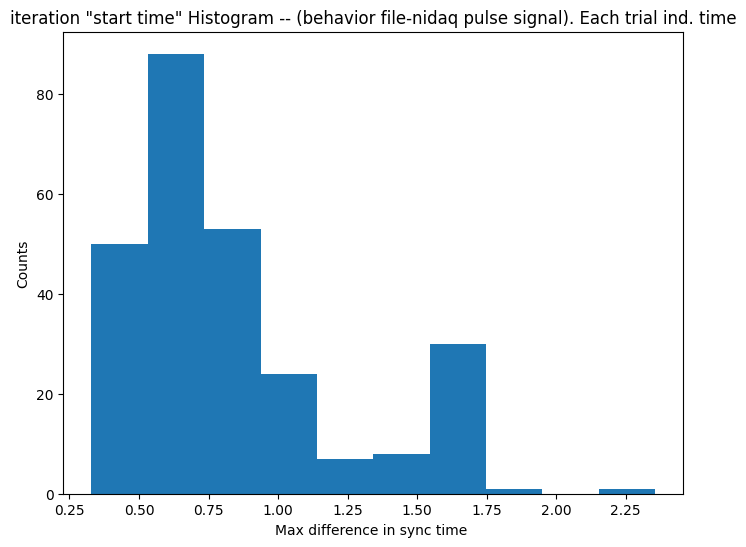

In [7]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['max_diff_time_trial_ind'])



plt.xlabel('Max difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

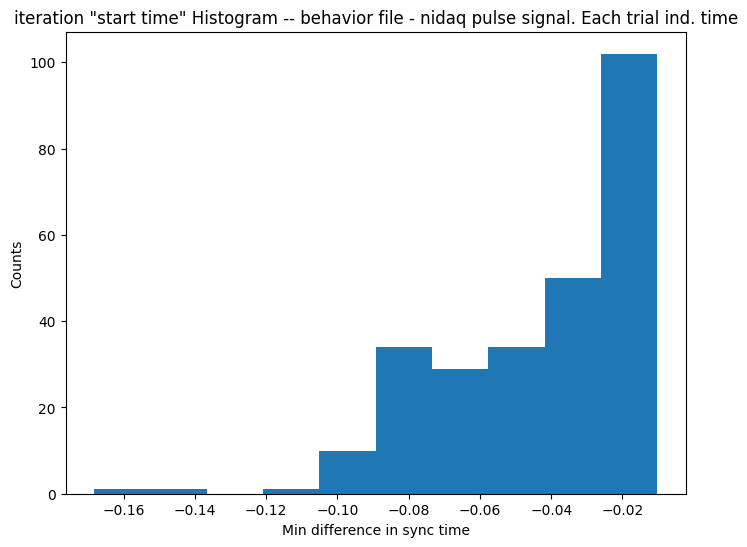

In [8]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['min_diff_time_trial_ind'])



plt.xlabel('Min difference in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

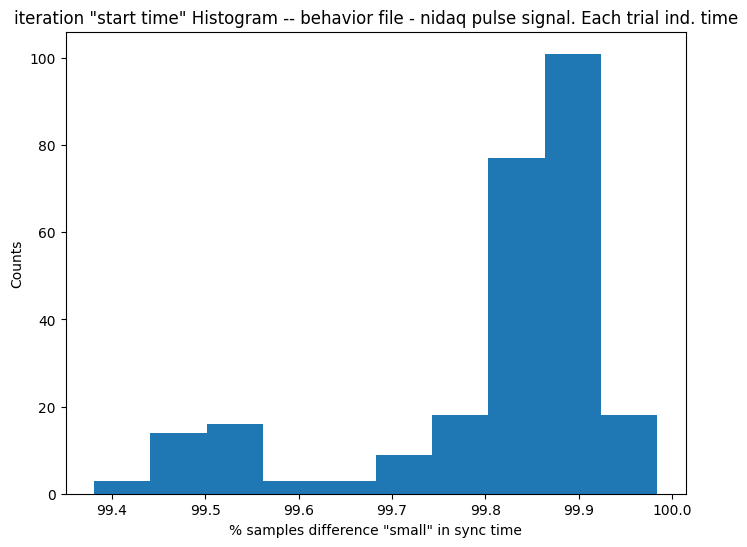

In [9]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['percent_little_diff_time_trial_ind'])



plt.xlabel('% samples difference "small" in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



#### "pulse only sync" single vector time for all session [0, ...] x 1
####  Historgrams stats  -- (behavior file - nidaq pulse signal) single vector time


Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

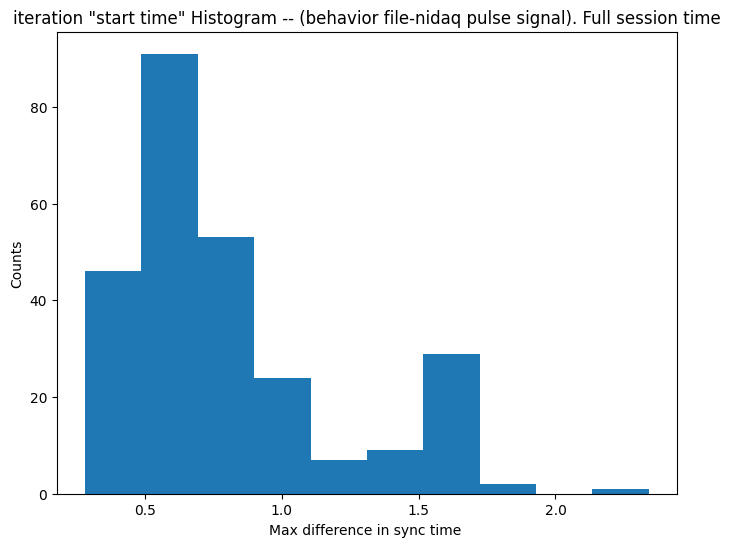

In [10]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['max_diff_time_trial_full_session'])



plt.xlabel('Max difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

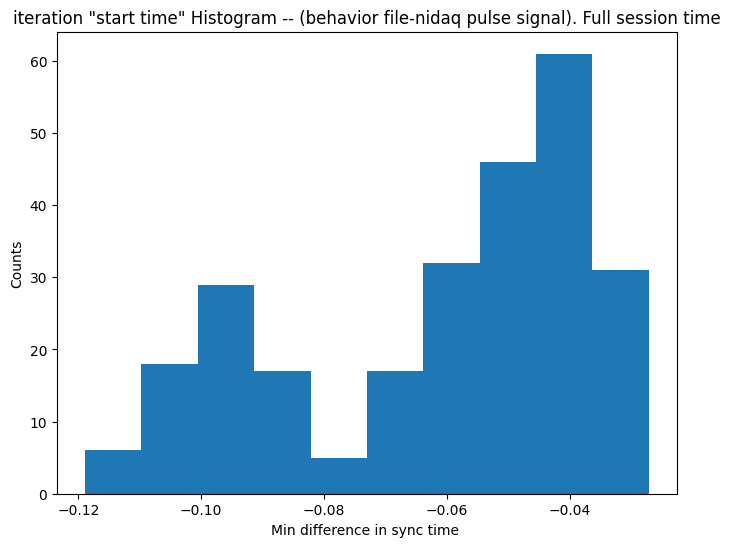

In [11]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['min_diff_time_trial_full_session'])



plt.xlabel('Min difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Full session time')

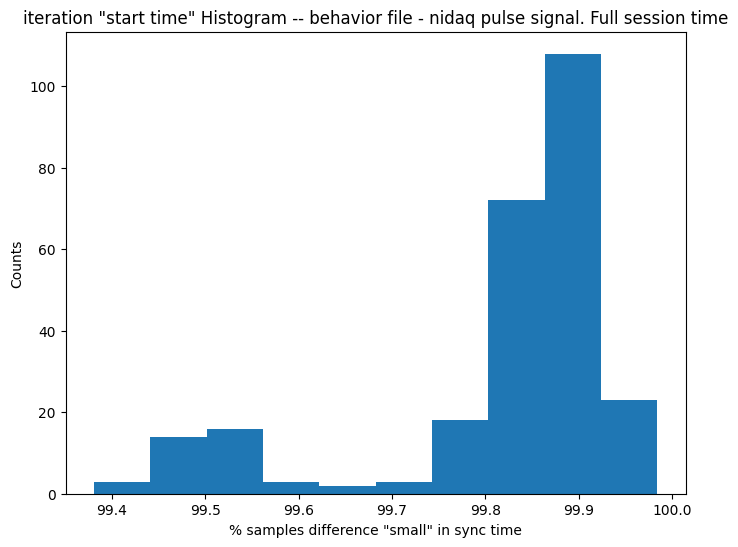

In [12]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['percent_little_diff_time_trial_full_session'])



plt.xlabel('% samples difference "small" in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Full session time')



In [13]:
stats_df = stats_df.sort_values(by='min_diff_time_trial_ind')
stats_df = stats_df.reset_index(drop=True)
stats_df

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,441,jjulian_JJ151,2025-01-31,1,-0.044204,-0.000005,0.044199,-0.074193,-0.029994,1.512781,...,0.024170,0.000058,0.024170,0.023208,0.007805,99.702174,100.0,99.702174,99.861546,100.0
1,409,jjulian_JJ151,2024-12-08,0,-0.030487,-0.000087,0.030400,-0.095569,-0.065169,0.917483,...,0.020777,0.000058,0.020777,0.019203,0.011067,99.872087,100.0,99.872087,99.892644,100.0
2,505,jyanar_ya054,2025-10-09,0,-0.028884,-0.000009,0.028875,-0.082489,-0.053614,1.599395,...,0.063331,0.000010,0.063331,0.063008,0.013928,99.472100,100.0,99.472100,99.476617,100.0
3,543,jyanar_ya054,2025-12-17,0,-0.030865,-0.000010,0.030855,-0.077693,-0.046838,1.644025,...,0.061245,0.000010,0.061245,0.061283,0.012798,99.496149,100.0,99.496149,99.496717,100.0
4,588,jyanar_ya054,2026-01-15,0,-0.024763,-0.000013,0.024750,-0.079609,-0.054859,1.657783,...,0.055476,0.000010,0.055476,0.055450,0.011436,99.577221,100.0,99.577221,99.577762,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,572,jk8386_jknpx7,2026-01-06,0,-0.008610,-0.000010,0.008600,-0.041888,-0.033288,0.691322,...,0.014060,0.000058,0.014060,0.017151,0.008938,99.878738,100.0,99.878738,99.881811,100.0
258,592,jk8386_jknpx7,2026-01-20,0,-0.010708,-0.000108,0.010600,-0.036324,-0.025724,0.484164,...,0.014728,0.000058,0.014728,0.016967,0.007014,99.794399,100.0,99.794399,99.796420,100.0
259,538,jk8386_jknpx6,2025-12-12,0,-0.011098,-0.000098,0.011000,-0.045114,-0.034114,0.494816,...,0.012481,0.000058,0.012481,0.015606,0.008150,99.853105,100.0,99.853105,99.856533,100.0
260,527,jk8386_jknpx6,2025-12-02,0,-0.012271,-0.000071,0.012200,-0.037298,-0.025098,0.482979,...,0.012802,0.000058,0.012803,0.014745,0.005923,99.837216,100.0,99.837216,99.837988,100.0


In [15]:
stats_df.loc[1,:]

recording_id                                             497
subject_fullname                                 jk8386_jk87
session_date                                      2025-09-23
session_number                                             1
last_diff_trial_ind                                 0.004677
last_diff_trial_ind_v                               0.000077
last_diff_trial_inds                                  0.0046
last_diff_time_trial_full_session                   0.034484
last_diff_time_trial_full_session_v                 0.029884
max_diff_time_trial_ind                             0.018409
max_diff_time_trial_ind_v                             0.0002
max_diff_time_trial_inds                              0.0184
max_diff_time_trial_full_session                    0.039874
max_diff_time_trial_full_session_v                   0.03054
min_diff_time_trial_ind                            -2.355553
min_diff_time_trial_ind_v                               -0.0
min_diff_time_trial_inds

In [14]:
file_path = "time_comparison_stats_behaviorync.pkl"
stats_df.to_pickle(file_path)

In [43]:
stats_df.loc[stats_df['last_diff_trial_ind']<-1,:]

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,506,jyanar_ya054,2025-10-18,0,-22.327404,2.322190e-07,-22.327404,-22.344406,-0.017002,0.039753,...,0.086419,0.000010,0.086419,0.086649,0.011340,94.705409,100.0,94.749242,88.402089,100.000000
1,556,jyanar_ya054,2026-01-02,0,-2.857303,1.791876e-06,-2.857305,-2.810501,0.046804,0.099363,...,0.062627,0.000010,0.062627,0.062616,0.012072,98.301631,100.0,98.301631,0.013546,0.560479
5,581,jyanar_ya054,2026-01-14,0,-1.646152,2.024060e-05,-1.646172,-1.611761,0.034411,0.088290,...,0.061390,0.000010,0.061390,0.061448,0.013099,98.409955,100.0,98.409955,0.005540,0.550145
6,553,jyanar_ya062,2026-01-02,0,-1.546769,7.449759e-06,-1.546776,-1.510351,0.036425,0.088832,...,0.058467,0.000010,0.058467,0.058461,0.012536,97.412620,100.0,97.413749,0.009598,0.588836
7,555,jyanar_ya062,2026-01-04,0,-1.555711,7.759093e-06,-1.555719,-1.517507,0.038212,0.089917,...,0.058572,0.000010,0.058572,0.058585,0.012129,98.110039,100.0,98.110039,0.007325,0.586598
8,580,jyanar_ya062,2026-01-14,0,-1.152930,2.446874e-05,-1.152954,-1.128288,0.024666,0.083840,...,0.057767,0.000010,0.057767,0.057777,0.013344,97.205223,100.0,97.208869,0.020833,4.492164
11,564,jyanar_ya062,2026-01-06,0,-1.419399,2.957339e-05,-1.419429,-1.377114,0.042315,0.087918,...,0.060434,0.000010,0.060434,0.060418,0.011438,97.554553,100.0,97.559650,0.014158,0.647324
12,588,jyanar_ya054,2026-01-15,0,-2.798156,1.314687e-05,-2.798169,-2.743310,0.054859,0.101772,...,0.055476,0.000010,0.055476,0.055450,0.011436,98.261787,100.0,98.266118,0.004872,0.547285
13,584,jyanar_ya062,2026-01-15,0,-1.524966,2.964830e-05,-1.524996,-1.484039,0.040957,0.086603,...,0.056432,0.000010,0.056433,0.056363,0.011404,97.929664,100.0,97.931329,0.003885,0.760973
14,534,jyanar_ya054,2025-12-11,0,-1.379218,1.653662e-05,-1.379235,-1.344408,0.034827,0.090000,...,0.063533,0.000010,0.063534,0.063539,0.011878,97.542394,100.0,97.543526,0.012452,0.546198
